# **Data Preparation**

In [4]:
import pandas as pd
url="https://raw.githubusercontent.com/Liz283/DataMining/main/dataset_1662109.csv"
df = pd.read_csv(url)
missing_values = df.isnull().sum()
data_types = df.dtypes
df.describe()
missing_values, data_types

(transaction_id        0
 transaction_date      0
 transaction_time    147
 transaction_qty      77
 store_id              0
 store_location        0
 unit_price            0
 product_category      0
 product_type          0
 dtype: int64,
 transaction_id        int64
 transaction_date     object
 transaction_time     object
 transaction_qty     float64
 store_id              int64
 store_location       object
 unit_price          float64
 product_category     object
 product_type         object
 dtype: object)

In [5]:
df_cleaned = df.dropna()

# **Part 1**

**Question 1: Probability of a Transaction Having More Than 2 Items**

In [6]:
# Step 1: Total number of transactions
N = df_cleaned.shape[0]

# Step 2: Transactions with more than 2 items
X = df_cleaned[df_cleaned['transaction_qty'] > 2].shape[0]

# Step 3: Calculate probability
Probability_X = X / N

print('Total Number of Transactions', N)
print('Number of Transactions with More Than 2 Items', X)
print('Probability of a Transaction Having More Than 2 Items', Probability_X)

Total Number of Transactions 7267
Number of Transactions with More Than 2 Items 1423
Probability of a Transaction Having More Than 2 Items 0.19581670565570386


**Question 2: How unit price varies for product types**

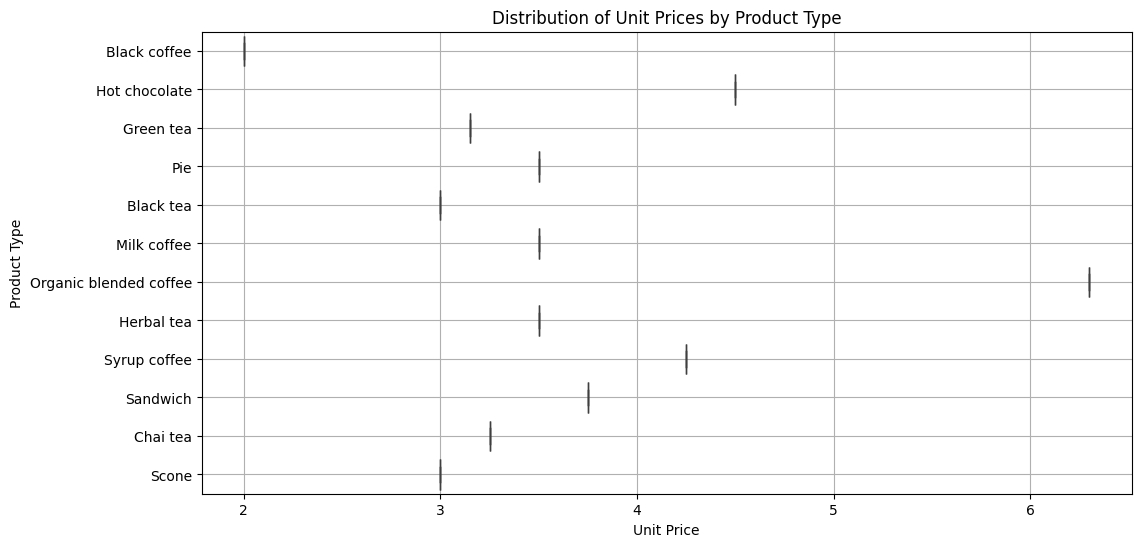

(None,
                          count  mean           std   min   25%   50%   75%  \
 product_type                                                                 
 Black coffee             460.0  2.00  0.000000e+00  2.00  2.00  2.00  2.00   
 Black tea                464.0  3.00  0.000000e+00  3.00  3.00  3.00  3.00   
 Chai tea                 449.0  3.25  0.000000e+00  3.25  3.25  3.25  3.25   
 Green tea                496.0  3.15  4.445376e-16  3.15  3.15  3.15  3.15   
 Herbal tea               445.0  3.50  0.000000e+00  3.50  3.50  3.50  3.50   
 Hot chocolate           1809.0  4.50  0.000000e+00  4.50  4.50  4.50  4.50   
 Milk coffee              471.0  3.50  0.000000e+00  3.50  3.50  3.50  3.50   
 Organic blended coffee   419.0  6.30  2.667721e-15  6.30  6.30  6.30  6.30   
 Pie                      645.0  3.50  0.000000e+00  3.50  3.50  3.50  3.50   
 Sandwich                 588.0  3.75  0.000000e+00  3.75  3.75  3.75  3.75   
 Scone                    554.0  3.00  0.0000

In [7]:
# Descriptive statistics for unit prices by product type
unit_price_stats = df_cleaned.groupby('product_type')['unit_price'].describe()

# Calculating skewness for each product type
skewness = df_cleaned.groupby('product_type')['unit_price'].skew()

# Merging the skewness with the descriptive statistics
unit_price_stats = unit_price_stats.join(skewness)

# For visualization, a boxplot shows the distribution of unit prices for each product type.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_price', y='product_type', data=df_cleaned, orient='h')
plt.title('Distribution of Unit Prices by Product Type')
plt.xlabel('Unit Price')
plt.ylabel('Product Type')
plt.grid(True)
plt.show(), unit_price_stats

**Question 3: Average revenue per transaction**

In [10]:
# Calculating the revenue for each transaction
df_cleaned.loc[:, 'revenue'] = df_cleaned['transaction_qty'] * df_cleaned['unit_price']

# Calculate the average revenue per transaction
average_revenue = df_cleaned['revenue'].mean()

# Calculate the standard deviation of the revenue
std_deviation = df_cleaned['revenue'].std()

# Number of transactions after cleaning
n_transactions = df_cleaned.shape[0]

# Calculate the 95% Confidence Interval for the mean revenue per transaction
from scipy.stats import norm
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)
margin_error = z_score * (std_deviation / (n_transactions ** 0.5))
confidence_interval = (average_revenue - margin_error, average_revenue + margin_error)
average_revenue, confidence_interval

print('Average revenue',average_revenue)
print('Confidence Interval',confidence_interval)


Average revenue 7.538241365074995
Confidence Interval (7.42347714237969, 7.6530055877703)


# **Part 2**

# *Question B1*

**Descriptive Analysis. How well do the different product types sell, in terms of quantity, per product category?**

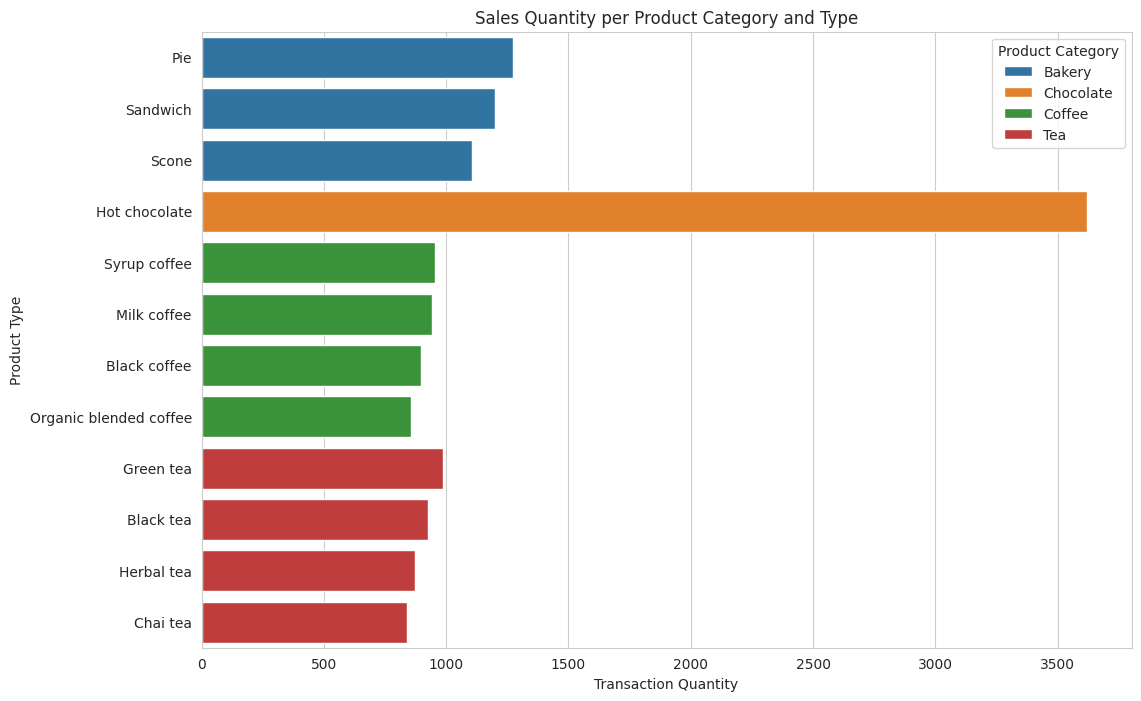

(count    7267.000000
 mean        1.992019
 std         1.176751
 min         1.000000
 25%         1.000000
 50%         2.000000
 75%         2.000000
 max         6.000000
 Name: transaction_qty, dtype: float64,
 1.554400649888724)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot a bar chart for product categories and types
sns.barplot(x='transaction_qty', y='product_type', hue='product_category', data=grouped_sales_sorted, dodge=False)
plt.title('Sales Quantity per Product Category and Type')
plt.xlabel('Transaction Quantity')
plt.ylabel('Product Type')
plt.legend(title='Product Category')

plt.show()

# Analyze central tendency and variation for transaction quantity
central_tendency = df_cleaned['transaction_qty'].describe()

# Analyze skewness
skewness = df_cleaned['transaction_qty'].skew()
central_tendency, skewness


 **Inferential Anlysis. Are there product types that sell
significantly worse than others in the
same category?**

In [30]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Filter the dataset for the Coffee category
coffee_sales = df_cleaned[df_cleaned['product_category'] == 'Coffee']

# ANOVA test requires at least two groups, so we separate the sales quantities by product type
black_coffee_sales = coffee_sales[coffee_sales['product_type'] == 'Black coffee']['transaction_qty']
milk_coffee_sales = coffee_sales[coffee_sales['product_type'] == 'Milk coffee']['transaction_qty']
syrup_coffee_sales = coffee_sales[coffee_sales['product_type'] == 'Syrup coffee']['transaction_qty']
organic_blended_coffee_sales = coffee_sales[coffee_sales['product_type'] == 'Organic blended coffee']['transaction_qty']

# Perform ANOVA test
anova_results_coffee = f_oneway(black_coffee_sales, milk_coffee_sales, syrup_coffee_sales, organic_blended_coffee_sales)

# Perform Tukey HSD test for Coffee
coffee_data = [black_coffee_sales, milk_coffee_sales, syrup_coffee_sales, organic_blended_coffee_sales]
coffee_groups = ['Black coffee', 'Milk coffee', 'Syrup coffee', 'Organic blended coffee']
tukey_results_coffee = pairwise_tukeyhsd(np.concatenate(coffee_data), np.repeat(coffee_groups, [len(s) for s in coffee_data]))

# For Tea category
tea_sales = df_cleaned[df_cleaned['product_category'] == 'Tea']
# Splitting tea sales by product type
green_tea_sales = tea_sales[tea_sales['product_type'] == 'Green tea']['transaction_qty']
black_tea_sales = tea_sales[tea_sales['product_type'] == 'Black tea']['transaction_qty']
herbal_tea_sales = tea_sales[tea_sales['product_type'] == 'Herbal tea']['transaction_qty']
chai_tea_sales = tea_sales[tea_sales['product_type'] == 'Chai tea']['transaction_qty']

# Perform ANOVA test for Tea
anova_results_tea = f_oneway(green_tea_sales, black_tea_sales, herbal_tea_sales, chai_tea_sales)

# Perform Tukey HSD test for Tea
tea_data = [green_tea_sales, black_tea_sales, herbal_tea_sales, chai_tea_sales]
tea_groups = ['Green tea', 'Black tea', 'Herbal tea', 'Chai tea']
tukey_results_tea = pairwise_tukeyhsd(np.concatenate(tea_data), np.repeat(tea_groups, [len(s) for s in tea_data]))

# For Bakery category
bakery_sales = df_cleaned[df_cleaned['product_category'] == 'Bakery']
# Splitting bakery sales by product type
pie_sales = bakery_sales[bakery_sales['product_type'] == 'Pie']['transaction_qty'].values
sandwich_sales = bakery_sales[bakery_sales['product_type'] == 'Sandwich']['transaction_qty'].values
scone_sales = bakery_sales[bakery_sales['product_type'] == 'Scone']['transaction_qty'].values

# Perform ANOVA test for Bakery, considering there might be categories with less than 2 types, handle those safely
anova_results_bakery = None
if len(set([len(pie_sales), len(sandwich_sales), len(scone_sales)])) > 1:  # Ensure there are at least two groups for comparison
    anova_results_bakery = f_oneway(pie_sales, sandwich_sales, scone_sales)

    # Perform Tukey HSD test for Bakery
    bakery_data = [pie_sales, sandwich_sales, scone_sales]
    bakery_groups = ['Pie', 'Sandwich', 'Scone']
    tukey_results_bakery = pairwise_tukeyhsd(np.concatenate(bakery_data), np.repeat(bakery_groups, [len(s) for s in bakery_data]))

print('ANOVA Results for Coffee Category:', anova_results_coffee)
print('\nTukey HSD Results for Coffee Category:')
print(tukey_results_coffee)

print('\nANOVA Results for Tea Category:', anova_results_tea)
print('\nTukey HSD Results for Tea Category:')
print(tukey_results_tea)

print('\nANOVA Results for Bakery:', anova_results_bakery)
if anova_results_bakery is not None:
    print('\nTukey HSD Results for Bakery:')
    print(tukey_results_bakery)


ANOVA Results for Coffee Category: F_onewayResult(statistic=0.6069363915894902, pvalue=0.6105063666111521)

Tukey HSD Results for Coffee Category:
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                 group2         meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------
          Black coffee            Milk coffee   0.0542 0.9017 -0.1485  0.257  False
          Black coffee Organic blended coffee   0.0906 0.6802 -0.1183 0.2994  False
          Black coffee           Syrup coffee    0.095 0.6256 -0.1082 0.2981  False
           Milk coffee Organic blended coffee   0.0363 0.9697 -0.1713  0.244  False
           Milk coffee           Syrup coffee   0.0407 0.9547 -0.1612 0.2427  False
Organic blended coffee           Syrup coffee   0.0044 0.9999 -0.2037 0.2125  False
-----------------------------------------------------------------------------------

ANOVA Result

# *Question C1*

**Descriptive Analysis. How do tea room locations compare in terms of sales revenue?**

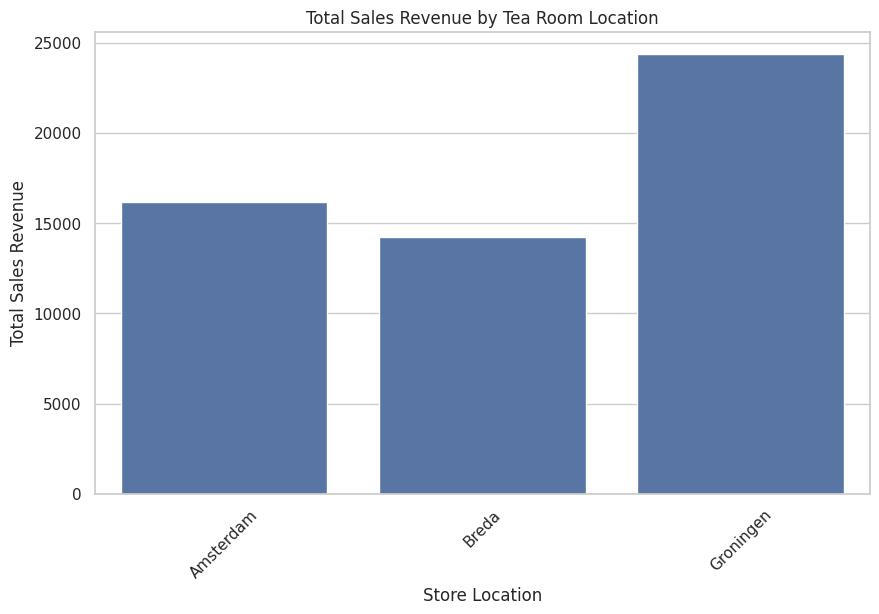

(  store_location   revenue
 0      Amsterdam  16183.30
 1          Breda  14215.45
 2      Groningen  24381.65,
 count    7267.000000
 mean        7.538241
 std         4.991557
 min         2.000000
 25%         3.750000
 50%         6.300000
 75%         9.000000
 max        37.800000
 Name: revenue, dtype: float64,
 1.9129407528925986)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by store location and calculate total sales revenue
location_revenue = df_cleaned.groupby('store_location')['revenue'].sum().reset_index()

# Plot total sales revenue by location
plt.figure(figsize=(10, 6))
sns.barplot(x='store_location', y='revenue', data=location_revenue)
plt.title('Total Sales Revenue by Tea Room Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.show()

# Descriptive statistics for sales revenue
revenue_stats = df_cleaned['revenue'].describe()

# Skewness
skewness = df_cleaned['revenue'].skew()
location_revenue, revenue_stats, skewness

**Inferential Analysis. Are there differences between locations ?**

In [47]:
from scipy.stats import f_oneway

# Extract sales revenue for each location into separate series
amsterdam_revenue = df_cleaned[df_cleaned['store_location'] == 'Amsterdam']['revenue']
breda_revenue = df_cleaned[df_cleaned['store_location'] == 'Breda']['revenue']
groningen_revenue = df_cleaned[df_cleaned['store_location'] == 'Groningen']['revenue']

# Perform the one-way ANOVA test
anova_result = f_oneway(amsterdam_revenue, breda_revenue, groningen_revenue)
print ('Anova result', anova_result.pvalue)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare the data for Tukey HSD test
endog = df_cleaned['revenue'] # Dependent variable
groups = df_cleaned['store_location'] # Grouping variable (independent variable)

# Perform the Tukey HSD test
tukey_hsd_result = pairwise_tukeyhsd(endog, groups, alpha=0.05)

# Print the results
print(tukey_hsd_result)


Anova result 0.8854776372436064
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Amsterdam     Breda   -0.044 0.9578 -0.4127 0.3248  False
Amsterdam Groningen   0.0273  0.979 -0.2987 0.3533  False
    Breda Groningen   0.0712 0.8746 -0.2674 0.4099  False
---------------------------------------------------------


# *Question A1*

 **Descriptive Analysis. How well do different product
categories sell in terms of revenue?**

In [49]:
# Now, let's get a summary of how well different product categories sell in terms of revenue
revenue_summary = df_cleaned.groupby('product_category')['revenue'].agg(['mean', 'std', 'min', 'max', 'count', 'sum']).reset_index()

# For a general understanding of the distribution of revenue across transactions, let's describe the revenue column
revenue_distribution = df_cleaned['revenue'].describe()
revenue_summary, revenue_distribution

(  product_category      mean       std  min   max  count       sum
 0           Bakery  6.860800  4.185311  3.0  22.5   1787  12260.25
 1        Chocolate  9.007463  5.328462  4.5  27.0   1809  16294.50
 2           Coffee  8.003990  6.041716  2.0  37.8   1817  14543.25
 3              Tea  6.301187  3.611886  3.0  21.0   1854  11682.40,
 count    7267.000000
 mean        7.538241
 std         4.991557
 min         2.000000
 25%         3.750000
 50%         6.300000
 75%         9.000000
 max        37.800000
 Name: revenue, dtype: float64)

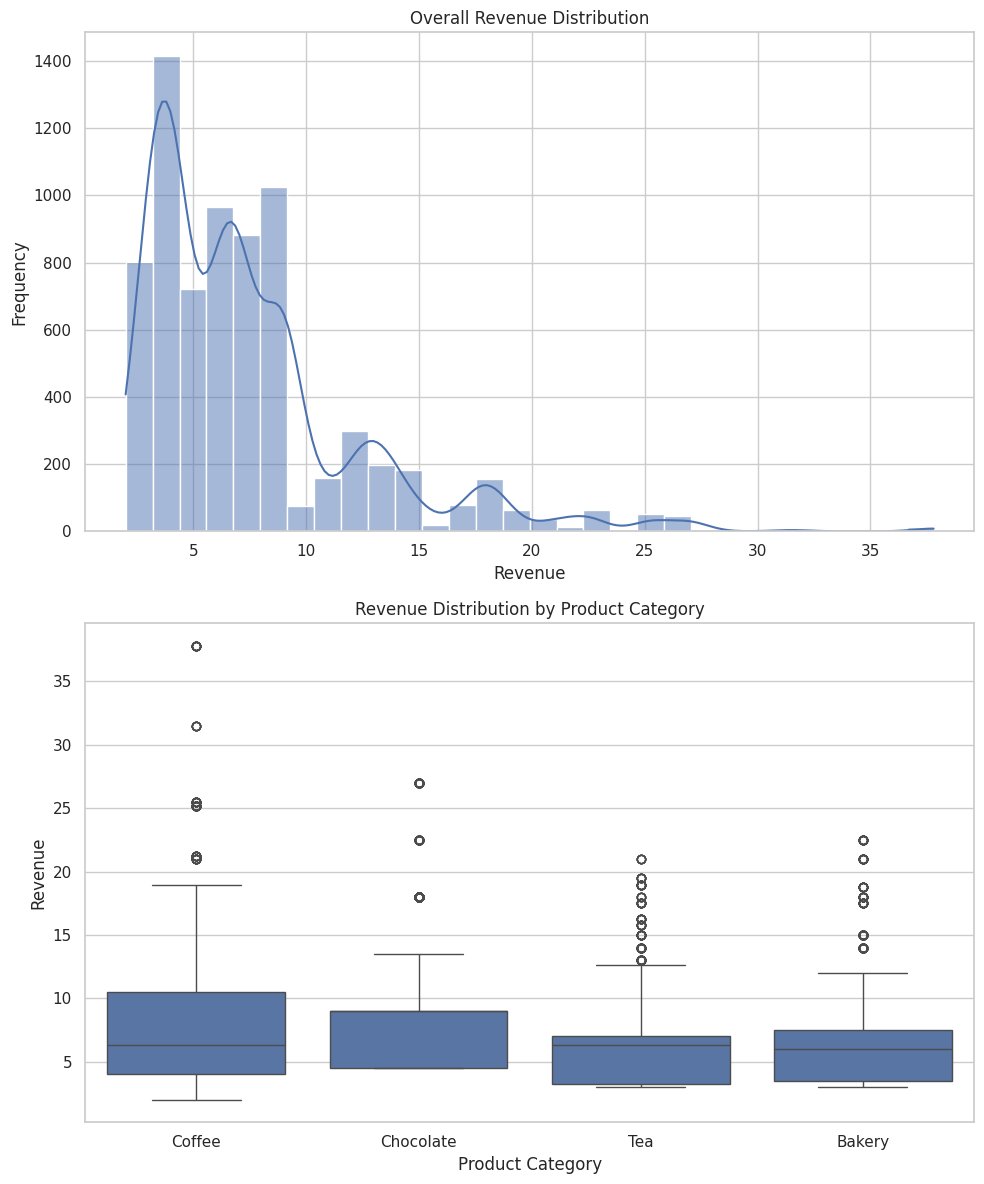

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# Creating a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Histogram for overall revenue distribution
sns.histplot(df_cleaned['revenue'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Overall Revenue Distribution')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# Boxplot for revenue by product category
sns.boxplot(x='product_category', y='revenue', data=df_cleaned, ax=axes[1])
axes[1].set_title('Revenue Distribution by Product Category')
axes[1].set_xlabel('Product Category')
axes[1].set_ylabel('Revenue')

plt.tight_layout()
plt.show()


 **Inferential Analysis. Are there product categories that sell
significantly worse than others?**

In [52]:
from scipy.stats import f_oneway

# Grouping revenue by product categories
category_groups = df_cleaned.groupby('product_category')['revenue'].apply(list)

# Preparing arguments for the ANOVA test by unpacking the groups
anova_args = [group for group in category_groups]

# Perform the ANOVA test
anova_result = f_oneway(*anova_args)
print ('Anova result', anova_result)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform the Tukey HSD (Honestly Significant Difference) test
tukey_hsd_result = pairwise_tukeyhsd(endog=df_cleaned['revenue'], groups=df_cleaned['product_category'], alpha=0.05)

# Display the results
print(tukey_hsd_result)


Anova result F_onewayResult(statistic=111.29116977068131, pvalue=1.8732820027525168e-70)
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Bakery Chocolate   2.1467    0.0  1.7283   2.565   True
   Bakery    Coffee   1.1432    0.0  0.7253  1.5611   True
   Bakery       Tea  -0.5596 0.0031 -0.9755 -0.1438   True
Chocolate    Coffee  -1.0035    0.0 -1.4201 -0.5868   True
Chocolate       Tea  -2.7063    0.0 -3.1208 -2.2917   True
   Coffee       Tea  -1.7028    0.0 -2.1169 -1.2887   True
----------------------------------------------------------
